In [27]:
# Import dependencies
import pandas as pd
import re
import json
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 400)

### Extract the crowdfunding.xlsx Data

In [3]:
# Read the data into a Pandas DataFrame
crowdfunding_info_df = pd.read_excel('Resources/crowdfunding.xlsx')
crowdfunding_info_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays


In [4]:
# Get a brief summary of the crowdfunding_info DataFrame.
crowdfunding_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   cf_id                    1000 non-null   int64 
 1   contact_id               1000 non-null   int64 
 2   company_name             1000 non-null   object
 3   blurb                    1000 non-null   object
 4   goal                     1000 non-null   int64 
 5   pledged                  1000 non-null   int64 
 6   outcome                  1000 non-null   object
 7   backers_count            1000 non-null   int64 
 8   country                  1000 non-null   object
 9   currency                 1000 non-null   object
 10  launched_at              1000 non-null   int64 
 11  deadline                 1000 non-null   int64 
 12  staff_pick               1000 non-null   bool  
 13  spotlight                1000 non-null   bool  
 14  category & sub-category  1000 non-null   

### Create the Category and Subcategory DataFrames
---
**Create a Category DataFrame that has the following columns:**
- A "category_id" column that is numbered sequential form 1 to the length of the number of unique categories.
- A "category" column that has only the categories.

Export the DataFrame as a `category.csv` CSV file.

**Create a SubCategory DataFrame that has the following columns:**
- A "subcategory_id" column that is numbered sequential form 1 to the length of the number of unique subcategories.
- A "subcategory" column that has only the subcategories. 

Export the DataFrame as a `subcategory.csv` CSV file.

In [5]:
# Get the crowdfunding_info_df columns.
crowd_columns = crowdfunding_info_df.columns.tolist()
crowd_columns

['cf_id',
 'contact_id',
 'company_name',
 'blurb',
 'goal',
 'pledged',
 'outcome',
 'backers_count',
 'country',
 'currency',
 'launched_at',
 'deadline',
 'staff_pick',
 'spotlight',
 'category & sub-category']

In [6]:
# Assign the category and subcategory values to category and subcategory columns.
#split column names
crowdfunding_info_df[['category', 'sub-category']] = crowdfunding_info_df['category & sub-category'].str.split('&', n=2, expand=True)
# crowdfunding_info_df.head()

#split values themselves
crowdfunding_info_df[['category', 'sub-category']] = crowdfunding_info_df['category & sub-category'].str.split('/', n=4, expand=True)
crowdfunding_info_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category,category,sub-category
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [7]:
# Get the unique categories and subcategories in separate lists.
categories = crowdfunding_info_df['category'].unique()
subcategories = crowdfunding_info_df['sub-category'].unique()

# print(len(categories))
print(categories)
print(subcategories)



['food' 'music' 'technology' 'theater' 'film & video' 'publishing' 'games'
 'photography' 'journalism']
['food trucks' 'rock' 'web' 'plays' 'documentary' 'electric music' 'drama'
 'indie rock' 'wearables' 'nonfiction' 'animation' 'video games' 'shorts'
 'fiction' 'photography books' 'radio & podcasts' 'metal' 'jazz'
 'translations' 'television' 'mobile games' 'world music'
 'science fiction' 'audio']


In [8]:
# Get the number of distinct values in the categories and subcategories lists.
print(len(categories))
print(len(subcategories))

9
24


In [9]:
# Create numpy arrays from 1-9 for the categories and 1-24 for the subcategories.
category_ids = np.arange(1, 10)
subcategory_ids = np.arange(1, 25)

print(category_ids)
print(subcategory_ids)

[1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [10]:
# Use a list comprehension to add "cat" to each category_id. 
category_ids.astype(str)
subcategory_ids.astype(str)
cat_ids = ['cat' + str(id) for id in category_ids]

# # Use a list comprehension to add "subcat" to each subcategory_id.    
scat_ids = ['cat' + str(id) for id in subcategory_ids]
    
print(cat_ids)
print(scat_ids)


['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24']


In [11]:
# Create a category DataFrame with the category_id array as the category_id and categories list as the category name.
category_df = pd.DataFrame({'category_id': cat_ids, 'category': categories})
# Create a category DataFrame with the subcategory_id array as the subcategory_id and subcategories list as the subcategory name. 
subcategory_df = pd.DataFrame({'subcategory_id': scat_ids, 'subcategory': subcategories})

In [12]:
category_df

,category_id,category
0,cat1,food
1,cat2,music
2,cat3,technology
3,cat4,theater
4,cat5,film & video
5,cat6,publishing
6,cat7,games
7,cat8,photography
8,cat9,journalism


In [13]:
subcategory_df

,subcategory_id,subcategory
0,cat1,food trucks
1,cat2,rock
2,cat3,web
3,cat4,plays
4,cat5,documentary
5,cat6,electric music
6,cat7,drama
7,cat8,indie rock
8,cat9,wearables
9,cat10,nonfiction


In [14]:
# Export categories_df and subcategories_df as CSV files.
category_df.to_csv("Resources/category.csv", index=False)

subcategory_df.to_csv("Resources/subcategory.csv", index=False)

### Campaign DataFrame
----
**Create a Campaign DataFrame that has the following columns:**
- The "cf_id" column.
- The "contact_id" column.
- The “company_name” column.
- The "blurb" column is renamed as "description."
- The "goal" column.
- The "goal" column is converted to a `float` datatype.
- The "pledged" column is converted to a `float` datatype. 
- The "backers_count" column. 
- The "country" column.
- The "currency" column.
- The "launched_at" column is renamed as "launch_date" and converted to a datetime format. 
- The "deadline" column is renamed as "end_date" and converted to a datetime format.
- The "category_id" with the unique number matching the “category_id” from the category DataFrame. 
- The "subcategory_id" with the unique number matching the “subcategory_id” from the subcategory DataFrame.
- And, create a column that contains the unique four-digit contact ID number from the `contact.xlsx` file.
 

Then export the DataFrame as a `campaign.csv` CSV file.


In [15]:
# Create a copy of the crowdfunding_info_df DataFrame name campaign_df. 
campaign_df = crowdfunding_info_df.copy()
campaign_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category,category,sub-category
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [16]:
# Rename the blurb, launched_at, and deadline columns.
# Renaming columns
rename_df = campaign_df.rename(columns={'blurb': 'description', 'launched_at': 'launch_date', 'deadline': 'end_date'})

# Display the updated DataFrame
rename_df.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,staff_pick,spotlight,category & sub-category,category,sub-category
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [17]:
# Convert the goal and pledged columns to a `float` data type.
rename_df["goal"] = rename_df["goal"].astype(float)
rename_df["pledged"] = rename_df["pledged"]. astype(float)
rename_df.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,staff_pick,spotlight,category & sub-category,category,sub-category
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [18]:
# Check the datatypes
rename_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cf_id                    1000 non-null   int64  
 1   contact_id               1000 non-null   int64  
 2   company_name             1000 non-null   object 
 3   description              1000 non-null   object 
 4   goal                     1000 non-null   float64
 5   pledged                  1000 non-null   float64
 6   outcome                  1000 non-null   object 
 7   backers_count            1000 non-null   int64  
 8   country                  1000 non-null   object 
 9   currency                 1000 non-null   object 
 10  launch_date              1000 non-null   int64  
 11  end_date                 1000 non-null   int64  
 12  staff_pick               1000 non-null   bool   
 13  spotlight                1000 non-null   bool   
 14  category & sub-category  

In [19]:
from datetime import datetime as dt
rename_df["launch_date"]  = pd.to_datetime(rename_df["launch_date"] , unit='s').dt.date
#df['date_only'] = df['datetime_column'].dt.date
rename_df["end_date"]  = pd.to_datetime(rename_df["end_date"] , unit='s').dt.date
rename_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cf_id                    1000 non-null   int64  
 1   contact_id               1000 non-null   int64  
 2   company_name             1000 non-null   object 
 3   description              1000 non-null   object 
 4   goal                     1000 non-null   float64
 5   pledged                  1000 non-null   float64
 6   outcome                  1000 non-null   object 
 7   backers_count            1000 non-null   int64  
 8   country                  1000 non-null   object 
 9   currency                 1000 non-null   object 
 10  launch_date              1000 non-null   object 
 11  end_date                 1000 non-null   object 
 12  staff_pick               1000 non-null   bool   
 13  spotlight                1000 non-null   bool   
 14  category & sub-category  

In [20]:
# Format the launched_date and end_date columns to datetime format
rename_df.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,staff_pick,spotlight,category & sub-category,category,sub-category
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,2020-02-13,2021-03-01,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,2021-01-25,2021-05-25,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,2020-12-17,2021-12-30,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,2021-10-21,2022-01-17,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53,US,USD,2020-12-21,2021-08-23,False,False,theater/plays,theater,plays


In [21]:
# Rename a single column
Final_df = rename_df.rename(columns={'sub-category': 'subcategory'})
Final_df.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,2020-02-13,2021-03-01,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,2021-01-25,2021-05-25,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,2020-12-17,2021-12-30,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,2021-10-21,2022-01-17,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53,US,USD,2020-12-21,2021-08-23,False,False,theater/plays,theater,plays


In [22]:
# Merge the campaign_df with the category_df on the "category" column and 
# the subcategory_df on the "subcategory" column.
campaign_merged_df =  Final_df.merge(category_df, on='category', how='left').merge(subcategory_df, on='subcategory', how='left')
#campaign_merged_df = rename_df.merge(subcategory_df, on='subcategory', how='left')
campaign_merged_df.tail(10)


,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory,category_id,subcategory_id
990,1561,5500,Ortiz-Roberts,Devolved foreground customer loyalty,7800.0,6839.0,failed,64,US,USD,2021-06-09,2021-06-18,False,True,film & video/drama,film & video,drama,cat5,cat7
991,2632,3494,Ramirez LLC,Reduced reciprocal focus group,9800.0,11091.0,successful,241,US,USD,2020-12-09,2021-05-26,False,True,music/rock,music,rock,cat2,cat2
992,439,3924,Morrow Inc,Networked global migration,3100.0,13223.0,successful,132,US,USD,2020-06-14,2021-02-09,False,True,film & video/drama,film & video,drama,cat5,cat7
993,461,3521,Erickson-Rogers,De-engineered even-keeled definition,9800.0,7608.0,canceled,75,IT,EUR,2021-07-03,2021-07-08,False,True,photography/photography books,photography,photography books,cat8,cat15
994,1419,5262,"Leach, Rich and Price",Implemented bi-directional flexibility,141100.0,74073.0,failed,842,US,USD,2021-11-15,2021-12-07,False,True,publishing/translations,publishing,translations,cat6,cat19
995,2986,3684,Manning-Hamilton,Vision-oriented scalable definition,97300.0,153216.0,successful,2043,US,USD,2020-12-29,2021-05-30,False,True,food/food trucks,food,food trucks,cat1,cat1
996,2031,5784,Butler LLC,Future-proofed upward-trending migration,6600.0,4814.0,failed,112,US,USD,2021-10-15,2021-11-30,False,False,theater/plays,theater,plays,cat4,cat4
997,1627,1498,Ball LLC,Right-sized full-range throughput,7600.0,4603.0,canceled,139,IT,EUR,2021-11-06,2021-12-10,False,False,theater/plays,theater,plays,cat4,cat4
998,2175,6073,"Taylor, Santiago and Flores",Polarized composite customer loyalty,66600.0,37823.0,failed,374,US,USD,2020-10-08,2021-04-11,False,True,music/indie rock,music,indie rock,cat2,cat8
999,1788,4939,"Hernandez, Norton and Kelley",Expanded eco-centric policy,111100.0,62819.0,canceled,1122,US,USD,2020-12-30,2021-08-18,False,False,food/food trucks,food,food trucks,cat1,cat1


In [23]:
# Drop unwanted columns
campaign_cleaned = campaign_merged_df[['cf_id', 'contact_id','company_name',
                                        'description','goal', 'pledged','outcome','backers_count', 'country',
                                        'currency', 'launch_date','end_date', 'category_id','subcategory_id'
                                       ]]

In [24]:
# Export the DataFrame as a CSV file. 
campaign_cleaned.to_csv("Resources/campaign.csv", index=False)

PermissionError: [Errno 13] Permission denied: 'Resources/campaign.csv'

### Extract the contacts.xlsx Data.

In [ ]:
# Read the data into a Pandas DataFrame. Use the `header=2` parameter when reading in the data.
contact_info_df = pd.read_excel('Resources/contacts.xlsx', header = 3)
contact_info_df.head()

### Create the Contacts DataFrame 
---
**Create a Contacts DataFrame that has the following columns:**
- A column named "contact_id"  that contains the unique number of the contact person.
- A column named "first_name" that contains the first name of the contact person.
- A column named "last_name" that contains the first name of the contact person.
- A column named "email" that contains the email address of the contact person

Then export the DataFrame as a `contacts.csv` CSV file.

### Option 1: Use Pandas to create the contacts DataFrame.

In [ ]:
# Iterate through the contact_info_df and convert each row to a dictionary.
dict_values = []

for index, row in contact_info_df.iterrows():
    x = row.to_dict()['contact_info']
    contact_id = x['contact_id']
    name = x['name']
    email = x['email']
    new_row = [contact_id,name,email]
    dict_values.append(new_row)



# Print out the list of values for each row.
print(dict_values)

In [ ]:
# Create a contact_info DataFrame and add each list of values, i.e., each row 
# to the 'contact_id', 'name', 'email' columns.
contacts = pd.DataFrame()

contact_info_df['contact_info'] = contact_info_df['contact_info'].apply(json.loads)
contacts = pd.json_normalize(contact_info_df['contact_info'])

contacts.head()

In [ ]:
# Check the datatypes.
contacts.info()

In [ ]:
# Create a "first"name" and "last_name" column with the first and last names from the "name" column. 
# Create a sample DataFrame


# Create new columns by splitting the 'full_name' column
contacts[['first_name', 'last_name']] = contacts['name'].str.split(' ', expand=True)

contacts.head()

In [ ]:
# Drop the contact_name column
contacts_clean = contacts.drop(columns=["name"])
contacts_clean.head()

In [ ]:
# Reorder the columns
contacts_clean.columns

In [ ]:
# Check the datatypes one more time before exporting as CSV file.
contacts_clean = contacts_clean[['contact_id','first_name', 'last_name','email']]
contacts_clean

In [ ]:
# Export the DataFrame as a CSV file. 
contacts_clean.to_csv("Resources/contacts.csv", encoding='utf8', index=False)

### Option 2: Use regex to create the contacts DataFrame.

In [ ]:
contact_info_df_copy = contact_info_df.copy()
contact_info_df_copy.head()

In [ ]:
contact_info_list = contact_info_df_copy.values.tolist()
contact_info_list 

In [ ]:
# Extract the four-digit contact ID number.
numbers_only = re.findall(r'\d+',['contact_id'])[0]
print(numbers_only)

In [ ]:
# Check the datatypes.


In [ ]:
# Convert the "contact_id" column to an int64 data type.


In [ ]:
# Extract the name of the contact and add it to a new column.


In [ ]:
# Extract the email from the contacts and add the values to a new column.


In [ ]:
# Create a copy of the contact_info_df with the 'contact_id', 'name', 'email' columns.


In [ ]:
# Create a "first"name" and "last_name" column with the first and last names from the "name" column. 


# Drop the contact_name column


In [ ]:
# Reorder the columns


In [ ]:
# Check the datatypes one more time before exporting as CSV file.


In [ ]:
# Export the DataFrame as a CSV file. 
# contacts_df_clean.to_csv("Resources/contacts.csv", encoding='utf8', index=False)

In [33]:
###***Our Visualization ***

In [34]:
##Goal: Pie chart for each country that shows the percentage of categories they contributed to in the dataframe

In [26]:
countries_count = campaign_cleaned['country'].nunique()
print(countries_count)

countries = campaign_cleaned['country'].unique()
print(countries)

7
['CA' 'US' 'AU' 'DK' 'GB' 'CH' 'IT']


In [60]:
# Data to plot
# #labels
category_labels = campaign_cleaned['category_id'].unique()
# print(category_labels)
category_series = pd.Series(category_labels)
labels_replaced = category_series.replace({'cat1': 'food', 'cat2': 'music', 'cat3': 'technology', 
                                'cat4': 'theater', 'cat5': 'film & video', 'cat6': 'publishing',
                               'cat7': 'games', 'cat8': 'photography', 'cat9': 'journalism'})
print(labels_replaced)

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orchid', 'mediumslateblue', 'olivedrab', 'darkorange', 'orangered']

0            food
1           music
2      technology
3         theater
4    film & video
5      publishing
6           games
7     photography
8      journalism
dtype: object


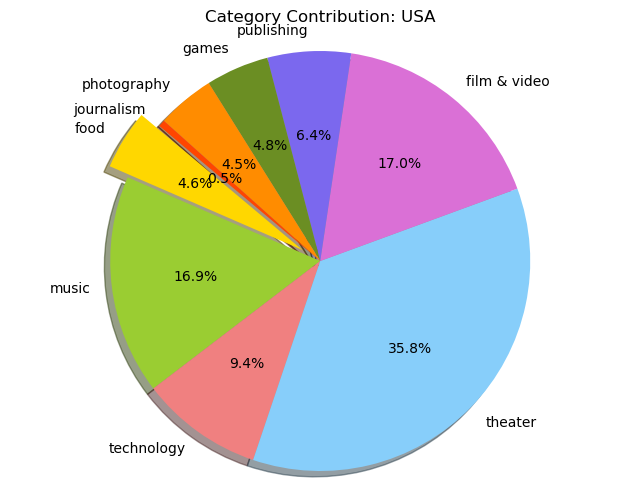

In [62]:
#values
# USA_categories_count = campaign_cleaned[campaign_cleaned['country'] == 'US']['category_id'].count()
# print(USA_categories_count)
USA_categories = campaign_cleaned[campaign_cleaned['country'] == 'US']['category_id'].value_counts()
# print(USA_categories)
USA_categories_sorted = USA_categories.sort_index(ascending=True)
# print(USA_categories_sorted)

explode1 = (0.1, 0, 0, 0, 0, 0, 0, 0, 0)  # explode the 1st slice

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(USA_categories_sorted, explode=explode, labels=labels_replaced, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  
plt.title("Category Contribution: USA")
plt.show()